# Create feature sets

The purpose of this notebook is to create the feature sets.

## Imports and helper functions

In [1]:
%run 'UNSEEN_helper_functions.ipynb'
%store -r

## Load codelist CSV files.
We used opencodelist.org to define codelists that define the set of SNOMED-CT codes used to identify patients based on various attributes.

In [2]:
# Set folder location.
folder_loc = os.path.dirname(os.path.abspath("UNSEEN_create_clinician_feature_sets.ipynb"))
folder = folder_loc + '/codelists/'

# Clinical codes of interest.
codes_to_query_crisisContraception = set( pandas.read_csv(folder + "ciaranmci-crisis-contraception-409408ed.csv")["code"] )
codes_to_query_UPSI = set( pandas.read_csv(folder + "ciaranmci-unprotected-sexual-intercourse-1c772b8e.csv")["code"] )
codes_to_query_teenagePregnancy = set( pandas.read_csv(folder + "ciaranmci-teenage-adolescent-pregnancy-3e52c03a.csv")["code"] )
codes_to_query_attemptedSuicide = set( pandas.read_csv(folder + "ciaranmci-attempted-suicide-0367b859.csv")["code"] )
codes_to_query_selfHarm = set( pandas.read_csv(folder + "ciaranmci-self-harm-6b0c26b8.csv")["code"] )
codes_to_query_CAMHSrefsAndDisch = set( pandas.read_csv(folder + "ciaranmci-camhs-referrals-and-discharges-0e87f47d.csv")["code"] )
codes_to_query_substanceMisuse = set( pandas.read_csv(folder + "ciaranmci-substance-misuse-363a8058.csv")["code"] )
codes_to_query_CYPmentalDisorder = set( pandas.read_csv(folder + "ciaranmci-child-young-person-mental-disorder-279767b2.csv")["code"] )
codes_to_query_childAbuse = set( pandas.read_csv(folder + "ciaranmci-child-abuse-041b99ee.csv")["code"] )
codes_to_query_familialSubstanceMisuse = set( pandas.read_csv(folder + "ciaranmci-familial-drug-abuse-and-misuse-3aec1eaf.csv")["code"] )
codes_to_query_socialServicesInvolved = set( pandas.read_csv(folder + "ciaranmci-social-services-involved-25434d05.csv")["code"] )
codes_to_query_childProtection = set( pandas.read_csv(folder + "ciaranmci-child-protection-13ed7469.csv")["code"] )
codes_to_query_familialMentalHealthConditions = set( pandas.read_csv(folder + "ciaranmci-family-history-of-mental-health-conditions-or-suicide-53fb91e4.csv")["code"] )
codes_to_query_partedParents = set( pandas.read_csv(folder + "ciaranmci-child-of-single-divorced-or-separated-parents-061a784f.csv")["code"] )
codes_to_query_depressionNotDysthymiaOrChronic = set( pandas.read_csv(folder + "ciaranmci-depression-not-chronic-not-dysthymia-782b413d.csv")["code"] )
codes_to_query_IAPTuse = set( pandas.read_csv(folder + "ciaranmci-iapt-use-51fcb383.csv")["code"] )
codes_to_query_anxietyOrPanic = set( pandas.read_csv(folder + "ciaranmci-anxiety-or-panic-finding-and-disorder-2cfce79e.csv")["code"] )
codes_to_query_agorophobia = set( pandas.read_csv(folder + "ciaranmci-agorophobia-67a5852d.csv")["code"] )
codes_to_query_eatingDisorders = set( pandas.read_csv(folder + "ciaranmci-eating-disorders-3ba00044.csv")["code"] )
codes_to_query_poorBodyImage = set( pandas.read_csv(folder + "ciaranmci-poor-body-image-27422b66.csv")["code"] )
codes_to_query_CYPneurodevDisorder = set( pandas.read_csv(folder + "ciaranmci-child-young-person-neurodevelopmental-disorder-59b64e1c.csv")["code"] )
codes_to_query_ADHD = set( pandas.read_csv(folder + "ciaranmci-attention-deficit-hyperactivity-disorder-752344fb.csv")["code"] )
codes_to_query_autism = set( pandas.read_csv(folder + "nhsd-primary-care-domain-refsets-autism_cod-20210127.csv")["code"] )
codes_to_query_SpLD = set( pandas.read_csv(folder + "ciaranmci-dyspraxia-dyscalculia-and-dyslexia-7889e686.csv")["code"] )
codes_to_query_adultVictimOfAbuse = set( pandas.read_csv(folder + "ciaranmci-adult-victim-of-abuse-447ef3b5.csv")["code"] )
codes_to_query_DNA = set( pandas.read_csv(folder + "ciaranmci-did-not-attend-098119da.csv")["code"] )
codes_to_query_violentBehaviour = set( pandas.read_csv(folder + "ciaranmci-violent-behaviour-7071a6a4.csv")["code"] )
codes_to_query_IAPTreferral = set( pandas.read_csv(folder + "ciaranmci-iapt-referral-16fed9a8.csv")["code"] )
codes_to_query_paranoia = set( pandas.read_csv(folder + "ciaranmci-paranoia-5c690e12.csv")["code"] )
codes_to_query_auditoryHallucinations = set( pandas.read_csv(folder + "ciaranmci-auditory-hallucinations-5762336f.csv")["code"] )
codes_to_query_dissociation = set( pandas.read_csv(folder + "ciaranmci-dissociation-75788147.csv")["code"] )
codes_to_query_NESA = set( pandas.read_csv(folder + "ciaranmci-non-epileptic-seizure-attack-depreciated-pseduoseizure-43599add.csv")["code"] )
codes_to_query_alcoholMisuse = set( pandas.read_csv(folder + "ciaranmci-alcohol-misuse-53df56ed.csv")["code"] )
codes_to_query_drugMisuse = set( pandas.read_csv(folder + "ciaranmci-drug-misuse-3acfe3b8.csv")["code"] )
codes_to_query_suicidal = set( pandas.read_csv(folder + "ciaranmci-suicidal-5eaa56c5.csv")["code"] )
codes_to_query_historyOfOrCurrentAddiction = set( pandas.read_csv(folder + "ciaranmci-history-of-or-current-addiction-5bf796cf.csv")["code"] )
codes_to_query_asylumSeeker = set( pandas.read_csv(folder + "ciaranmci-asylum-seeker-4972fc5e.csv")["code"] )
codes_to_query_raisedInCareSystem = set( pandas.read_csv(folder + "ciaranmci-raised-in-care-system-7e44a2be.csv")["code"] )
codes_to_query_brainInjury = set( pandas.read_csv(folder + "ciaranmci-brain-injury-30638929.csv")["code"] )
codes_to_query_homeless = set( pandas.read_csv(folder + "ciaranmci-homelessness-0e1fe637.csv")["code"] )
codes_to_query_incarcerationImprisonment = set( pandas.read_csv(folder + "ciaranmci-incarceration-or-imprisonment-75107301.csv")["code"] )
codes_to_query_sleepDisturbance = set( pandas.read_csv(folder + "ciaranmci-sleep-disturbance-dyssomnia-29e21962.csv")["code"] )
codes_to_query_tinnitus = set( pandas.read_csv(folder + "ciaranmci-tinnitus-finding-10d2a62d.csv")["code"] )
codes_to_query_abandonment = set( pandas.read_csv(folder + "ciaranmci-abandonment-008f546f.csv")["code"] )

codes_to_query_mentalIllHealth = set( pandas.read_csv(folder + "mental_ill_health_codelist.txt", sep = '\t')["Id"] )
codes_to_query_bipolar = set( pandas.read_csv(folder + "ciaranmci-bipolar-disorder-6a0308d7.csv")["code"] )
codes_to_query_schizophrenia = set( pandas.read_csv(folder + "ciaranmci-schizophrenia-05c53c03.csv")["code"] )
codes_to_query_dementia = set( pandas.read_csv(folder + "bristol-dementia-snomed-ct-v13-7a6320f3.csv")["code"] )
codes_to_exclude = set( codes_to_query_bipolar.union(codes_to_query_schizophrenia).union(codes_to_query_dementia) )
codes_to_query_mentalIllHealth = codes_to_query_mentalIllHealth.difference(codes_to_exclude)

# Medications of interest.
medications_to_query_all = pandas.read_csv(folder + "UNSEEN_medications_list.csv")
medications_to_query_antidepressants = pandas.read_csv(folder + "UNSEEN_medications_antidepressants.csv")
medications_to_query_hypnoticsAndAnxiolytics = pandas.read_csv(folder + "UNSEEN_medications_hypnoticsAndAnxiolytics.csv")
medications_to_query_psychosisAndRelated = pandas.read_csv(folder + "UNSEEN_medications_psychosisAndRelated.csv")
medications_to_query_alcoholMisuse = pandas.read_csv(folder + "UNSEEN_medications_indicating_treatment_for_alcohol_misuse.csv")
medications_to_query_drugMisuse = pandas.read_csv(folder + "UNSEEN_medications_indicating_treatment_for_drug_misuse.csv")

## Load requisites

In [3]:
%%capture
if 'caseness_array' not in globals():
    print("not here")
    %run ./"UNSEEN_create_caseness_variables.ipynb"
%store -r

# Set thresholds for life-course versions of feature sets.
# ## Child or Young Person or Adolescent
CYPA_threshold = 18
# ## Emerging Adult
EA_threshold = 29
# ## Adult
Adult_threshold = 30

## Create BiqQuery syntax

The final query makes use of a few component scripts of BigQuery syntax:

1. sql_declarations: Declares BigQuery variables using variables defined in the 'Load requisites' section of this an other notebooks. Defined in `UNSEEN_create_caseness_variable.ipynb`.
2. sql_studyPopulation: Script of Common Table expressions (CTEs) that define the study population into CTE table called `tbl_studyPopulation_no_caseness`. Defined in `UNSEEN_create_caseness_variable.ipynb`.
3. sql_fs_CTEs: Script of CTEs that define the CTE tables containing the feature sets. These CTE tables require joining.
4. sql_final_select: Script joining the CTE tables that defined the feature sets.

### Part 1.

#### Defining sql_fs_CTEs

In [4]:
sql_CTEs_body_pt1 = \
"""
#  ## Abandonment.
,tbl_abandonment AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_abandonment)) + """'
                ]) AS snomedcode
)
,tbl_abandonment_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_abandonment
    WHERE
        a.snomedcode IN (tbl_abandonment.snomedcode)
)
,tbl_abandonment_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_abandonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_abandonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_abandonment_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_abandonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_abandonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_abandonment_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_abandonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_abandonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## ADHD
,tbl_ADHD AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_ADHD)) + """'
                ]) AS snomedcode
)
,tbl_ADHD_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_ADHD
    WHERE
        a.snomedcode IN (tbl_ADHD.snomedcode)
)
,tbl_ADHD_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_ADHD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_ADHD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_ADHD_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_ADHD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_ADHD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_ADHD_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_ADHD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_ADHD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## adultVictimOfAbuse
,tbl_adultVictimOfAbuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_adultVictimOfAbuse)) + """'
                ]) AS snomedcode
)
,tbl_adultVictimOfAbuse_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_adultVictimOfAbuse
    WHERE
        a.snomedcode IN (tbl_adultVictimOfAbuse.snomedcode)
)


#  ## First admission to psychiatric rehabilitation services before 30 years of age.
,tbl_admissionToPsychRehabServices_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('306139004')
)
,tbl_firstAdmissionToPsychRehabServicesBefore30_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,tbl_admissionToPsychRehabServices_persons.snomedcode
        ,(MIN((EXTRACT(YEAR FROM tbl_admissionToPsychRehabServices_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth)) < 30) AS firstAdmissionToPsychRehabServicesBefore30
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_admissionToPsychRehabServices_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_admissionToPsychRehabServices_persons.person_id
    WHERE
        IS_NAN((EXTRACT(YEAR FROM tbl_admissionToPsychRehabServices_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth)) = FALSE
    GROUP BY
        tbl_studyPopulation_no_caseness.person_id, tbl_admissionToPsychRehabServices_persons.snomedcode
)


#  ## Agorophobia
,tbl_agorophobia AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_agorophobia)) + """'
                ]) AS snomedcode
)
,tbl_agorophobia_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_agorophobia
    WHERE
        a.snomedcode IN (tbl_agorophobia.snomedcode)
)
,tbl_agorophobia_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_agorophobia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_agorophobia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_agorophobia_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_agorophobia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_agorophobia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_agorophobia_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_agorophobia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_agorophobia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Alcohol misuse.
,tbl_meds_alcoholMisuse AS (
    SELECT
        nameofmedication
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, medications_to_query_alcoholMisuse["Medication"].tolist())) + """'
                ]) AS nameofmedication
)
,tbl_codes_alcoholMisuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_alcoholMisuse)) + """'
                ]) AS snomedcode
)
,tbl_meds_alcoholMisuse_persons AS (
    SELECT
      DISTINCT person_id, datemedicationstart AS dateevent
    FROM
      """ + server_id + """.""" + database_id + """.tbl_srprimarycaremedication, tbl_meds_alcoholMisuse
    WHERE
        tbl_srprimarycaremedication.nameofmedication LIKE CAST(CONCAT('%',tbl_meds_alcoholMisuse.nameofmedication,'%') AS STRING)
        AND DATE_DIFF(CURRENT_DATE(), CAST(datemedicationstart AS DATE), MONTH) < 4
)
,tbl_codes_alcoholMisuse_persons AS (
    SELECT
        DISTINCT person_id, dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_codes_alcoholMisuse
    WHERE
        a.snomedcode IN (tbl_codes_alcoholMisuse.snomedcode)
)
,tbl_alcoholMisuse_persons AS (
    SELECT
        DISTINCT person_id, dateevent
    FROM
        (SELECT * FROM tbl_meds_alcoholMisuse_persons
        UNION ALL
        SELECT * FROM tbl_codes_alcoholMisuse_persons)
)
,tbl_alcoholMisuse_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_alcoholMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_alcoholMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_alcoholMisuse_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_alcoholMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_alcoholMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_alcoholMisuse_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_alcoholMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_alcoholMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Anxiety or panic
,tbl_anxietyOrPanic AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_anxietyOrPanic)) + """'
                ]) AS snomedcode
)
,tbl_anxietyOrPanic_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_anxietyOrPanic
    WHERE
        a.snomedcode IN (tbl_anxietyOrPanic.snomedcode)
)
,tbl_anxietyOrPanic_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_anxietyOrPanic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_anxietyOrPanic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_anxietyOrPanic_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_anxietyOrPanic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_anxietyOrPanic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_anxietyOrPanic_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_anxietyOrPanic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_anxietyOrPanic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Asylum seeker.
,tbl_asylumSeeker AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_asylumSeeker)) + """'
                ]) AS snomedcode
)
,tbl_asylumSeeker_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_asylumSeeker
    WHERE
        a.snomedcode IN (tbl_asylumSeeker.snomedcode)
)
,tbl_asylumSeeker_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_asylumSeeker_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_asylumSeeker_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_asylumSeeker_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_asylumSeeker_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_asylumSeeker_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_asylumSeeker_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_asylumSeeker_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_asylumSeeker_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Attempted Suicide
,tbl_attemptedSuicide AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_attemptedSuicide)) + """'
                ]) AS snomedcode
)
,tbl_attemptedSuicide_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_attemptedSuicide
    WHERE
        a.snomedcode IN (tbl_attemptedSuicide.snomedcode)
)
,tbl_attemptedSuicide_CYPA_persons AS (
    SELECT
        DISTINCT tbl_attemptedSuicide_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_attemptedSuicide_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_attemptedSuicide_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_attemptedSuicide_EA_persons AS (
    SELECT
        DISTINCT tbl_attemptedSuicide_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_attemptedSuicide_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_attemptedSuicide_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_attemptedSuicide_Adult_persons AS (
    SELECT
        DISTINCT tbl_attemptedSuicide_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_attemptedSuicide_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_attemptedSuicide_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Auditory hallucinations
,tbl_auditoryHallucinations AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_auditoryHallucinations)) + """'
                ]) AS snomedcode
)
,tbl_auditoryHallucinations_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_auditoryHallucinations
    WHERE
        a.snomedcode IN (tbl_auditoryHallucinations.snomedcode)
)
,tbl_auditoryHallucinations_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_auditoryHallucinations_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_auditoryHallucinations_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_auditoryHallucinations_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_auditoryHallucinations_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_auditoryHallucinations_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_auditoryHallucinations_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_auditoryHallucinations_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_auditoryHallucinations_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Autism
,tbl_autism AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_autism)) + """'
                ]) AS snomedcode
)
,tbl_autism_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_autism
    WHERE
        a.snomedcode IN (tbl_autism.snomedcode)
)
,tbl_autism_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_autism_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_autism_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_autism_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_autism_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_autism_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_autism_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_autism_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_autism_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Body dysmorphic disorder.
,tbl_bodyDysmorphicDisorder_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
       snomedcode IN ('83482000')
)
,tbl_bodyDysmorphicDisorder_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_bodyDysmorphicDisorder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_bodyDysmorphicDisorder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_bodyDysmorphicDisorder_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_bodyDysmorphicDisorder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_bodyDysmorphicDisorder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_bodyDysmorphicDisorder_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_bodyDysmorphicDisorder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_bodyDysmorphicDisorder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Brain injury
,tbl_brainInjury AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_brainInjury)) + """'
                ]) AS snomedcode
)
,tbl_brainInjury_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_brainInjury
    WHERE
        a.snomedcode IN (tbl_brainInjury.snomedcode)
)
,tbl_brainInjury_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_brainInjury_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_brainInjury_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_brainInjury_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_brainInjury_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_brainInjury_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_brainInjury_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_brainInjury_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_brainInjury_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## CAMHS referrals and Discharges.
,tbl_CAMHSrefsAndDisch AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_CAMHSrefsAndDisch)) + """'
                ]) AS snomedcode
)
,tbl_CAMHSrefsAndDisch_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_CAMHSrefsAndDisch
    WHERE
        a.snomedcode IN (tbl_CAMHSrefsAndDisch.snomedcode)
)
,tbl_CAMHSrefsAndDisch_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    JOIN tbl_CAMHSrefsAndDisch_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CAMHSrefsAndDisch_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_CAMHSrefsAndDisch_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_CAMHSrefsAndDisch_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    JOIN tbl_CAMHSrefsAndDisch_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CAMHSrefsAndDisch_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_CAMHSrefsAndDisch_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)


#  ## Child abuse
,tbl_childAbuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_childAbuse)) + """'
                ]) AS snomedcode
)
,tbl_childAbuse_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_childAbuse
    WHERE
        a.snomedcode IN (tbl_childAbuse.snomedcode)
)


#  ## Child protection
,tbl_childProtection AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_childProtection)) + """'
                ]) AS snomedcode
)
,tbl_childProtection_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_childProtection
    WHERE
        a.snomedcode IN (tbl_childProtection.snomedcode)
)


#  ## Count of appointments in the previous year.
,tbl_countAppointmentsPreviousYear_persons AS ( 
    SELECT 
        DISTINCT person_id
        ,COUNT( DISTINCT EXTRACT(DATE FROM datestart) ) AS countAppointmentsPreviousYear
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srappointment
    WHERE
        DATE_DIFF(CURRENT_DATE(), datestart, YEAR) <= 1
    GROUP BY
        person_id
    ORDER BY
        person_id
)


#  ## Count of Did-Not-Attend (DNA) in the previous year.
,tbl_DNAcodes AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_DNA)) + """'
                ]) AS snomedcode
)
,tbl_countDNAsPreviousYear_persons AS ( 
    SELECT 
      DISTINCT person_id
     ,COUNT(person_id) AS countDNAsPreviousYear
    FROM
      """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_DNAcodes
    WHERE
      a.snomedcode IN (tbl_DNAcodes.snomedcode)
      AND DATE_DIFF(CURRENT_DATE(), dateevent, YEAR) <= 1
    GROUP BY
        person_id
)


# ## Ratio of annual counts of Did-Not-Attend (DNA) to appointment, in the previous year.
,tbl_ratioDNAtoAppointmentPreviousYear_persons AS (
    SELECT
        DISTINCT tbl_countDNAsPreviousYear_persons.person_id
        ,(countDNAsPreviousYear / countAppointmentsPreviousYear) AS ratioDNAtoAppointmentPreviousYear
    FROM
        tbl_countDNAsPreviousYear_persons
    LEFT JOIN tbl_countAppointmentsPreviousYear_persons ON tbl_countDNAsPreviousYear_persons.person_id = tbl_countAppointmentsPreviousYear_persons.person_id
        
)


# ## Count of psychological disorders.
,tbl_codes_mentalIllHealth AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_mentalIllHealth)) + """'
                ]) AS snomedcode
)
,tbl_countPsychologicalDisorders_persons_and_codes AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,tbl_srcode.snomedcode
    FROM
        tbl_studyPopulation_no_caseness
    JOIN
        """ + server_id + """.""" + database_id + """.tbl_srcode
        ON tbl_studyPopulation_no_caseness.person_id = tbl_srcode.person_id
    JOIN 
        tbl_codes_mentalIllHealth USING(snomedcode)
)
,tbl_countPsychologicalDisorders AS (
    SELECT
        person_id
        ,COUNT(snomedcode) AS countPsychologicalDisorders
    FROM
        tbl_countPsychologicalDisorders_persons_and_codes
    GROUP BY
        person_id
)


# ## Crisis contraception
,tbl_crisisContraception AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_crisisContraception)) + """'
                ]) AS snomedcode
)
,tbl_crisisContraception_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_crisisContraception
    WHERE
        a.snomedcode IN (tbl_crisisContraception.snomedcode)
)
,tbl_crisisContraceptionCYP_persons AS (
    SELECT
        DISTINCT tbl_crisisContraception_persons.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_crisisContraception_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_crisisContraception_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_crisisContraception_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < 19
)


#  ## Child or young person mental disorder
,tbl_CYPmentalDisorder AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_CYPmentalDisorder)) + """'
                ]) AS snomedcode
)
,tbl_CYPmentalDisorder_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_CYPmentalDisorder
    WHERE
        a.snomedcode IN (tbl_CYPmentalDisorder.snomedcode)
)


#  ## Child or young person neurodevelopmental disorder
,tbl_CYPneurodevDisorder AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_CYPneurodevDisorder)) + """'
                ]) AS snomedcode
)
,tbl_CYPneurodevDisorder_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_CYPneurodevDisorder
    WHERE
        a.snomedcode IN (tbl_CYPneurodevDisorder.snomedcode)
)
"""

#### Defining sql_final_select

In [5]:
sql_select_pt1 = \
"""
SELECT
    DISTINCT tbl_studyPopulation_no_caseness.person_id
   
    ,CASE WHEN tbl_abandonment_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS abandonment_CYP
    ,CASE WHEN tbl_abandonment_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS abandonment_EA
    ,CASE WHEN tbl_abandonment_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS abandonment_Adult
    
    ,CASE WHEN tbl_ADHD_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS ADHD_CYP
    ,CASE WHEN tbl_ADHD_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS ADHD_EA
    ,CASE WHEN tbl_ADHD_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS ADHD_Adult
    
    ,CASE WHEN tbl_adultVictimOfAbuse_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS adultVictimOfAbuse
    
    ,firstAdmissionToPsychRehabServicesBefore30
    
    ,CASE WHEN tbl_agorophobia_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS agorophobia_CYPA
    ,CASE WHEN tbl_agorophobia_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS agorophobia_EA
    ,CASE WHEN tbl_agorophobia_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS agorophobia_Adult
    
    ,CASE WHEN tbl_alcoholMisuse_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS alcoholMisuse_CYPA
    ,CASE WHEN tbl_alcoholMisuse_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS alcoholMisuse_EA
    ,CASE WHEN tbl_alcoholMisuse_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS alcoholMisuse_Adult
    
    ,CASE WHEN tbl_anxietyOrPanic_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS anxietyOrPanic_CYPA
    ,CASE WHEN tbl_anxietyOrPanic_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS anxietyOrPanic_EA
    ,CASE WHEN tbl_anxietyOrPanic_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS anxietyOrPanic_Adult
    
    ,CASE WHEN tbl_asylumSeeker_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS asylumSeeker_CYPA
    ,CASE WHEN tbl_asylumSeeker_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS asylumSeeker_EA
    ,CASE WHEN tbl_asylumSeeker_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS asylumSeeker_Adult
    
    ,CASE WHEN tbl_attemptedSuicide_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS attemptedSuicide_CYPA
    ,CASE WHEN tbl_attemptedSuicide_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS attemptedSuicide_EA
    ,CASE WHEN tbl_attemptedSuicide_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS attemptedSuicide_Adult
    
    ,CASE WHEN tbl_auditoryHallucinations_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS auditoryHallucinations_CYPA
    ,CASE WHEN tbl_auditoryHallucinations_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS auditoryHallucinations_EA
    ,CASE WHEN tbl_auditoryHallucinations_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS auditoryHallucinations_Adult
    
    ,CASE WHEN tbl_autism_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS autism_CYPA
    ,CASE WHEN tbl_autism_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS autism_EA
    ,CASE WHEN tbl_autism_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS autism_Adult
    
    ,CASE WHEN tbl_bodyDysmorphicDisorder_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS bodyDysmorphicDisorder_CYPA
    ,CASE WHEN tbl_bodyDysmorphicDisorder_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS bodyDysmorphicDisorder_EA
    ,CASE WHEN tbl_bodyDysmorphicDisorder_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS bodyDysmorphicDisorder_Adult
    
    ,CASE WHEN tbl_brainInjury_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS brainInjury_CYPA
    ,CASE WHEN tbl_brainInjury_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS brainInjury_EA
    ,CASE WHEN tbl_brainInjury_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS brainInjury_Adult
    
    ,CASE WHEN tbl_CAMHSrefsAndDisch_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS CAMHSrefsAndDisch_CYPA
    ,CASE WHEN tbl_CAMHSrefsAndDisch_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS CAMHSrefsAndDisch_EA
    
    ,CASE WHEN tbl_childAbuse_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS childAbuse
    
    ,CASE WHEN tbl_childProtection_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS childProtection
    
    ,countAppointmentsPreviousYear
    
    ,countDNAsPreviousYear
    
    ,ratioDNAtoAppointmentPreviousYear
    
    ,countPsychologicalDisorders
    
    ,CASE WHEN tbl_crisisContraceptionCYP_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS crisisContraceptionCYP
    
    ,CASE WHEN tbl_CYPmentalDisorder_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS CYPmentalDisorder
    
    ,CASE WHEN tbl_CYPneurodevDisorder_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS CYPneurodevDisorder
   
FROM tbl_studyPopulation_no_caseness

LEFT JOIN tbl_abandonment_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_CYPA_persons.person_id
LEFT JOIN tbl_abandonment_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_EA_persons.person_id
LEFT JOIN tbl_abandonment_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_abandonment_Adult_persons.person_id

LEFT JOIN tbl_ADHD_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_CYPA_persons.person_id
LEFT JOIN tbl_ADHD_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_EA_persons.person_id
LEFT JOIN tbl_ADHD_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ADHD_Adult_persons.person_id

LEFT JOIN tbl_adultVictimOfAbuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_adultVictimOfAbuse_persons.person_id

LEFT JOIN tbl_firstAdmissionToPsychRehabServicesBefore30_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_firstAdmissionToPsychRehabServicesBefore30_persons.person_id

LEFT JOIN tbl_agorophobia_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_CYPA_persons.person_id
LEFT JOIN tbl_agorophobia_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_EA_persons.person_id
LEFT JOIN tbl_agorophobia_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_agorophobia_Adult_persons.person_id

LEFT JOIN tbl_alcoholMisuse_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_CYPA_persons.person_id
LEFT JOIN tbl_alcoholMisuse_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_EA_persons.person_id
LEFT JOIN tbl_alcoholMisuse_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_alcoholMisuse_Adult_persons.person_id

LEFT JOIN tbl_anxietyOrPanic_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_CYPA_persons.person_id
LEFT JOIN tbl_anxietyOrPanic_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_EA_persons.person_id
LEFT JOIN tbl_anxietyOrPanic_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_anxietyOrPanic_Adult_persons.person_id

LEFT JOIN tbl_asylumSeeker_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_CYPA_persons.person_id
LEFT JOIN tbl_asylumSeeker_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_EA_persons.person_id
LEFT JOIN tbl_asylumSeeker_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_asylumSeeker_Adult_persons.person_id

LEFT JOIN tbl_attemptedSuicide_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_CYPA_persons.person_id
LEFT JOIN tbl_attemptedSuicide_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_EA_persons.person_id
LEFT JOIN tbl_attemptedSuicide_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_attemptedSuicide_Adult_persons.person_id

LEFT JOIN tbl_auditoryHallucinations_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_CYPA_persons.person_id
LEFT JOIN tbl_auditoryHallucinations_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_EA_persons.person_id
LEFT JOIN tbl_auditoryHallucinations_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_auditoryHallucinations_Adult_persons.person_id

LEFT JOIN tbl_autism_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_CYPA_persons.person_id
LEFT JOIN tbl_autism_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_EA_persons.person_id
LEFT JOIN tbl_autism_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_autism_Adult_persons.person_id

LEFT JOIN tbl_bodyDysmorphicDisorder_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_CYPA_persons.person_id
LEFT JOIN tbl_bodyDysmorphicDisorder_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_EA_persons.person_id
LEFT JOIN tbl_bodyDysmorphicDisorder_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_bodyDysmorphicDisorder_Adult_persons.person_id

LEFT JOIN tbl_brainInjury_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_CYPA_persons.person_id
LEFT JOIN tbl_brainInjury_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_EA_persons.person_id
LEFT JOIN tbl_brainInjury_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_brainInjury_Adult_persons.person_id

LEFT JOIN tbl_CAMHSrefsAndDisch_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CAMHSrefsAndDisch_CYPA_persons.person_id
LEFT JOIN tbl_CAMHSrefsAndDisch_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CAMHSrefsAndDisch_EA_persons.person_id

LEFT JOIN tbl_childAbuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_childAbuse_persons.person_id

LEFT JOIN tbl_childProtection_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_childProtection_persons.person_id

LEFT JOIN tbl_countAppointmentsPreviousYear_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_countAppointmentsPreviousYear_persons.person_id

LEFT JOIN tbl_countDNAsPreviousYear_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_countDNAsPreviousYear_persons.person_id

LEFT JOIN tbl_ratioDNAtoAppointmentPreviousYear_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_ratioDNAtoAppointmentPreviousYear_persons.person_id

LEFT JOIN tbl_countPsychologicalDisorders  ON tbl_studyPopulation_no_caseness.person_id = tbl_countPsychologicalDisorders.person_id

LEFT JOIN tbl_crisisContraceptionCYP_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_crisisContraceptionCYP_persons.person_id

LEFT JOIN tbl_CYPmentalDisorder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CYPmentalDisorder_persons.person_id

LEFT JOIN tbl_CYPneurodevDisorder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_CYPneurodevDisorder_persons.person_id

ORDER BY tbl_studyPopulation_no_caseness.person_id
"""

#### Running the query

In [6]:
feature_set_array_pt1 = pandas.read_gbq(sql_declarations + sql_studyPopulation + sql_CTEs_body_pt1 + sql_select_pt1)

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


### Part 2.

#### Defining sql_fs_CTEs

In [ ]:
sql_CTEs_body_pt2 = \
"""
#  ## Depression that is not dysthymia or chronic depression
,tbl_depressionNotDysthymiaOrChronic AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_depressionNotDysthymiaOrChronic)) + """'
                ]) AS snomedcode
)
,tbl_depressionNotDysthymiaOrChronic_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_depressionNotDysthymiaOrChronic
    WHERE
        a.snomedcode IN (tbl_depressionNotDysthymiaOrChronic.snomedcode)
)
,tbl_depressionNotDysthymiaOrChronic_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_depressionNotDysthymiaOrChronic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_depressionNotDysthymiaOrChronic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_depressionNotDysthymiaOrChronic_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_depressionNotDysthymiaOrChronic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_depressionNotDysthymiaOrChronic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_depressionNotDysthymiaOrChronic_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_depressionNotDysthymiaOrChronic_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_depressionNotDysthymiaOrChronic_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Dissociation
,tbl_dissociation AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_dissociation)) + """'
                ]) AS snomedcode
)
,tbl_dissociation_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_dissociation
    WHERE
        a.snomedcode IN (tbl_dissociation.snomedcode)
)
,tbl_dissociation_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_dissociation_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_dissociation_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_dissociation_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_dissociation_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_dissociation_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_dissociation_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_dissociation_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_dissociation_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Drug misuse.
,tbl_meds_drugMisuse AS (
    SELECT
        nameofmedication
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, medications_to_query_drugMisuse["Medication"].tolist())) + """'
                ]) AS nameofmedication
)
,tbl_codes_drugMisuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_drugMisuse)) + """'
                ]) AS snomedcode
)
,tbl_meds_drugMisuse_persons AS (
    SELECT
      DISTINCT person_id, datemedicationstart AS dateevent
    FROM
      """ + server_id + """.""" + database_id + """.tbl_srprimarycaremedication, tbl_meds_drugMisuse
    WHERE
        tbl_srprimarycaremedication.nameofmedication LIKE CAST(CONCAT('%',tbl_meds_drugMisuse.nameofmedication,'%') AS STRING)
        AND DATE_DIFF(CURRENT_DATE(), CAST(datemedicationstart AS DATE), MONTH) < 4
)
,tbl_codes_drugMisuse_persons AS (
    SELECT
        DISTINCT person_id, dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_codes_drugMisuse
    WHERE
        a.snomedcode IN (tbl_codes_drugMisuse.snomedcode)
)
,tbl_drugMisuse_persons AS (
    SELECT
        DISTINCT person_id, dateevent
    FROM
        (SELECT * FROM tbl_meds_drugMisuse_persons
        UNION ALL
        SELECT * FROM tbl_codes_drugMisuse_persons)
)
,tbl_drugMisuse_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_drugMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_drugMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_drugMisuse_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_drugMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_drugMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_drugMisuse_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_drugMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_drugMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Eating disorders
,tbl_eatingDisorders AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_eatingDisorders)) + """'
                ]) AS snomedcode
)
,tbl_eatingDisorders_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_eatingDisorders
    WHERE
        a.snomedcode IN (tbl_eatingDisorders.snomedcode)
)
,tbl_eatingDisorders_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_eatingDisorders_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_eatingDisorders_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_eatingDisorders_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_eatingDisorders_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_eatingDisorders_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_eatingDisorders_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_eatingDisorders_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_eatingDisorders_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Extreme self-neglect.
,tbl_extremeSelfNeglect_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
       snomedcode IN ('277850002', '439124004', '735939003')
)


#  ## Family history of mental health conditions or suicide
,tbl_familialMentalHealthConditions AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_familialMentalHealthConditions)) + """'
                ]) AS snomedcode
)
,tbl_familialMentalHealthConditions_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_familialMentalHealthConditions
    WHERE
        a.snomedcode IN (tbl_familialMentalHealthConditions.snomedcode)
)


#  ## Familial substance misuse
,tbl_familialSubstanceMisuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_familialSubstanceMisuse)) + """'
                ]) AS snomedcode
)
,tbl_familialSubstanceMisuse_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_familialSubstanceMisuse
    WHERE
        a.snomedcode IN (tbl_familialSubstanceMisuse.snomedcode)
)


# ## Family history of alcoholism.
,tbl_familyHistoryOfAlcoholism_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
       snomedcode IN ('266890009', '293161000000103')
)


# ## Family history of psychosis.
,tbl_familyHistoryOfPsychosis_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
       snomedcode IN ('266969002', '429399002', '293721000000105', '293731000000107')
)


# ## Food insecurity.
,tbl_foodInsecurity_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('1078229009', '1004109000', '1002223009')
),tbl_foodInsecurity_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_foodInsecurity_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_foodInsecurity_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_foodInsecurity_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_foodInsecurity_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_foodInsecurity_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_foodInsecurity_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_foodInsecurity_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_foodInsecurity_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## History of or current addiction.
,tbl_historyOfOrCurrentAddiction AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_historyOfOrCurrentAddiction)) + """'
                ]) AS snomedcode
)
,tbl_historyOfOrCurrentAddiction_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_historyOfOrCurrentAddiction
    WHERE
        a.snomedcode IN (tbl_historyOfOrCurrentAddiction.snomedcode)
)


# ## Hoarder.
,tbl_hoarder_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('248025009', '247968005')
)
,tbl_hoarder_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_hoarder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_hoarder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_hoarder_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_hoarder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_hoarder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_hoarder_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_hoarder_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_hoarder_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Homeless.
,tbl_homeless AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_homeless)) + """'
                ]) AS snomedcode
)
,tbl_homeless_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_homeless
    WHERE
        a.snomedcode IN (tbl_homeless.snomedcode)
)
,tbl_homeless_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_homeless_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_homeless_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_homeless_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_homeless_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_homeless_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_homeless_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_homeless_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_homeless_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## IAPT referral
,tbl_IAPTreferral AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_IAPTreferral)) + """'
                ]) AS snomedcode
)
,tbl_IAPTreferral_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_IAPTreferral
    WHERE
        a.snomedcode IN (tbl_IAPTreferral.snomedcode)
)
,tbl_IAPTreferral_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTreferral_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTreferral_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_IAPTreferral_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTreferral_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTreferral_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_IAPTreferral_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTreferral_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTreferral_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## IAPT revolving door.
,tbl_IAPTrevolvingDoor AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,COUNT(snomedcode) AS n_occurrences
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('747821000000108')
    GROUP BY
        person_id, snomedcode
)
,tbl_IAPTrevolvingDoor_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        tbl_IAPTrevolvingDoor
    WHERE
        n_occurrences > 1
)
,tbl_IAPTrevolvingDoor_CYP AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
        ,COUNT(snomedcode) AS n_occurrences
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN """ + server_id + """.""" + database_id + """.tbl_srcode AS a
        ON tbl_studyPopulation_no_caseness.person_id = a.person_id
    WHERE
        snomedcode IN ('747821000000108')
        AND (EXTRACT(YEAR FROM a.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
    GROUP BY
        person_id, snomedcode
)
,tbl_IAPTrevolvingDoor_CYPA_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        tbl_IAPTrevolvingDoor_CYP
    WHERE
        n_occurrences > 1
)
,tbl_IAPTrevolvingDoor_EA AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
        ,COUNT(snomedcode) AS n_occurrences
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN """ + server_id + """.""" + database_id + """.tbl_srcode AS a
        ON tbl_studyPopulation_no_caseness.person_id = a.person_id
    WHERE
        snomedcode IN ('747821000000108')
        AND (EXTRACT(YEAR FROM a.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
    GROUP BY
        person_id, snomedcode
)
,tbl_IAPTrevolvingDoor_EA_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        tbl_IAPTrevolvingDoor_EA
    WHERE
        n_occurrences > 1
)
,tbl_IAPTrevolvingDoor_Adult AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
        ,COUNT(snomedcode) AS n_occurrences
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN """ + server_id + """.""" + database_id + """.tbl_srcode AS a
        ON tbl_studyPopulation_no_caseness.person_id = a.person_id
    WHERE
        snomedcode IN ('747821000000108')
        AND (EXTRACT(YEAR FROM a.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
    GROUP BY
        person_id, snomedcode
)
,tbl_IAPTrevolvingDoor_Adult_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        tbl_IAPTrevolvingDoor_Adult
    WHERE
        n_occurrences > 1
)


#  ## IAPT use
,tbl_IAPTuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_IAPTuse)) + """'
                ]) AS snomedcode
)
,tbl_IAPTuse_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_IAPTuse
    WHERE
        a.snomedcode IN (tbl_IAPTuse.snomedcode)
)
,tbl_IAPTuse_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_IAPTuse_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_IAPTuse_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_IAPTuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_IAPTuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Incarceration or imprisonment.
,tbl_incarcerationImprisonment AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_incarcerationImprisonment)) + """'
                ]) AS snomedcode
)
,tbl_incarcerationImprisonment_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_incarcerationImprisonment
    WHERE
        a.snomedcode IN (tbl_incarcerationImprisonment.snomedcode)
)
,tbl_incarcerationImprisonment_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_incarcerationImprisonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_incarcerationImprisonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_incarcerationImprisonment_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_incarcerationImprisonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_incarcerationImprisonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_incarcerationImprisonment_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_incarcerationImprisonment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_incarcerationImprisonment_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Many Did-Not-Attend (DNA)
,tbl_manyDNA AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_DNA)) + """'
                ]) AS snomedcode
)
,tbl_manyDNA_count AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,EXTRACT(YEAR FROM dateevent) AS year_occurrence
        ,COUNT(person_id) AS n_occurrences
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_manyDNA
    WHERE
        a.snomedcode IN (tbl_manyDNA.snomedcode)
    GROUP BY
        person_id, a.snomedcode, year_occurrence
)
,tbl_manyDNA_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,year_occurrence
    FROM
        tbl_manyDNA_count
    WHERE
        # Justification for threshold is in section entitled "Rational for the threshold we used for 'manyDNA'".
        n_occurrences > 4
)
,tbl_manyDNA_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_manyDNA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_persons.person_id
    WHERE (tbl_manyDNA_persons.year_occurrence - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_manyDNA_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_manyDNA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_persons.person_id
    WHERE (tbl_manyDNA_persons.year_occurrence - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_manyDNA_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_manyDNA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_persons.person_id
    WHERE (tbl_manyDNA_persons.year_occurrence - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Median annual count of appointments.
,tbl_annualCountOfAppointments AS (
    SELECT 
        DISTINCT person_id
        ,EXTRACT(YEAR FROM datestart) AS year_appointment
        ,COUNT( DISTINCT EXTRACT(DATE FROM datestart) ) AS countAppointmentsPerYear
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srappointment
    GROUP BY
        person_id
        ,year_appointment
    ORDER BY
        person_id
        ,year_appointment
)
,tbl_medianAnnualCountAppointments_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countAppointmentsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfAppointments.person_id) AS medianAnnualCountAppointments
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfAppointments ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfAppointments.person_id
)
,tbl_medianAnnualCountAppointments_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countAppointmentsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfAppointments.person_id) AS medianAnnualCountAppointments_CYPA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfAppointments ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfAppointments.person_id
    WHERE (tbl_annualCountOfAppointments.year_appointment - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_medianAnnualCountAppointments_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countAppointmentsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfAppointments.person_id) AS medianAnnualCountAppointments_EA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfAppointments ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfAppointments.person_id
    WHERE (tbl_annualCountOfAppointments.year_appointment - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_medianAnnualCountAppointments_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countAppointmentsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfAppointments.person_id) AS medianAnnualCountAppointments_Adult
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfAppointments ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfAppointments.person_id
    WHERE (tbl_annualCountOfAppointments.year_appointment - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Median annual count of Did-Not-Attend (DNA).
,tbl_annualCountOfDNAs AS ( 
    SELECT 
        DISTINCT person_id
        ,EXTRACT(YEAR FROM dateevent) AS year_DNA
        ,COUNT( DISTINCT EXTRACT(DATE FROM dateevent) ) AS countDNAsPerYear
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_manyDNA
    WHERE
        a.snomedcode IN (tbl_manyDNA.snomedcode)
    GROUP BY
        person_id
        ,year_DNA
)
,tbl_medianAnnualCountDNAs_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countDNAsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfDNAs.person_id) AS medianAnnualCountDNAs
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfDNAs ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfDNAs.person_id
)
,tbl_medianAnnualCountDNAs_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countDNAsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfDNAs.person_id) AS medianAnnualCountDNAs_CYPA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfDNAs ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfDNAs.person_id
    WHERE (tbl_annualCountOfDNAs.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_medianAnnualCountDNAs_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countDNAsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfDNAs.person_id) AS medianAnnualCountDNAs_EA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfDNAs ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfDNAs.person_id
    WHERE (tbl_annualCountOfDNAs.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_medianAnnualCountDNAs_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC(countDNAsPerYear, 0.5) OVER(PARTITION BY tbl_annualCountOfDNAs.person_id) AS medianAnnualCountDNAs_Adult
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualCountOfDNAs ON tbl_studyPopulation_no_caseness.person_id = tbl_annualCountOfDNAs.person_id
    WHERE (tbl_annualCountOfDNAs.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Median annual ratio of DNA to appointments
,tbl_annualRatioDNAtoAppointment_persons AS (
    SELECT
        DISTINCT tbl_annualCountOfDNAs.person_id
        ,(countDNAsPerYear / countAppointmentsPerYear) AS ratioDNAtoAppointment
        ,year_DNA
    FROM
        tbl_annualCountOfDNAs
    LEFT JOIN
        tbl_annualCountOfAppointments
        ON
        (
        tbl_annualCountOfDNAs.person_id = tbl_annualCountOfAppointments.person_id
        AND tbl_annualCountOfDNAs.year_DNA = tbl_annualCountOfAppointments.year_appointment
        )
)
,tbl_medianAnnualRatioDNAtoAppointment_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC( ratioDNAtoAppointment, 0.5) OVER(PARTITION BY tbl_annualRatioDNAtoAppointment_persons.person_id) AS medianAnnualRatioDNAtoAppointment
    FROM
        tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualRatioDNAtoAppointment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_annualRatioDNAtoAppointment_persons.person_id
)
,tbl_medianAnnualRatioDNAtoAppointment_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC( ratioDNAtoAppointment, 0.5) OVER(PARTITION BY tbl_annualRatioDNAtoAppointment_persons.person_id) AS medianAnnualRatioDNAtoAppointment_CYPA
    FROM
        tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualRatioDNAtoAppointment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_annualRatioDNAtoAppointment_persons.person_id
    WHERE (tbl_annualRatioDNAtoAppointment_persons.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_medianAnnualRatioDNAtoAppointment_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC( ratioDNAtoAppointment, 0.5) OVER(PARTITION BY tbl_annualRatioDNAtoAppointment_persons.person_id) AS medianAnnualRatioDNAtoAppointment_EA
    FROM
        tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualRatioDNAtoAppointment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_annualRatioDNAtoAppointment_persons.person_id
    WHERE (tbl_annualRatioDNAtoAppointment_persons.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_medianAnnualRatioDNAtoAppointment_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,PERCENTILE_DISC( ratioDNAtoAppointment, 0.5) OVER(PARTITION BY tbl_annualRatioDNAtoAppointment_persons.person_id) AS medianAnnualRatioDNAtoAppointment_Adult
    FROM
        tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_annualRatioDNAtoAppointment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_annualRatioDNAtoAppointment_persons.person_id
    WHERE (tbl_annualRatioDNAtoAppointment_persons.year_DNA - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Metabolic syndrome.
,tbl_metabolicSyndrome_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('237602007')
)
,tbl_metabolicSyndrome_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_metabolicSyndrome_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_metabolicSyndrome_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_metabolicSyndrome_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_metabolicSyndrome_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_metabolicSyndrome_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_metabolicSyndrome_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_metabolicSyndrome_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_metabolicSyndrome_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)
"""

#### Defining sql_final_select

In [ ]:
sql_select_pt2 = \
"""
SELECT
    DISTINCT tbl_studyPopulation_no_caseness.person_id
   
    ,CASE WHEN tbl_depressionNotDysthymiaOrChronic_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS depressionNotDysthymiaOrChronic_CYPA
    ,CASE WHEN tbl_depressionNotDysthymiaOrChronic_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS depressionNotDysthymiaOrChronic_EA
    ,CASE WHEN tbl_depressionNotDysthymiaOrChronic_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS depressionNotDysthymiaOrChronic_Adult
    
    ,CASE WHEN tbl_dissociation_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS dissociation_CYPA
    ,CASE WHEN tbl_dissociation_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS dissociation_EA
    ,CASE WHEN tbl_dissociation_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS dissociation_Adult
    
    ,CASE WHEN tbl_drugMisuse_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS drugMisuse_CYPA
    ,CASE WHEN tbl_drugMisuse_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS drugMisuse_EA
    ,CASE WHEN tbl_drugMisuse_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS drugMisuse_Adult
    
    ,CASE WHEN tbl_eatingDisorders_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS eatingDisorders_CYPA
    ,CASE WHEN tbl_eatingDisorders_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS eatingDisorders_EA
    ,CASE WHEN tbl_eatingDisorders_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS eatingDisorders_Adult
    
    ,CASE WHEN tbl_extremeSelfNeglect_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS extremeSelfNeglect
    
    ,CASE WHEN tbl_familialMentalHealthConditions_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS familialMentalHealthConditions
        
    ,CASE WHEN tbl_familialSubstanceMisuse_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS familialSubstanceMisuse
    
    ,CASE WHEN tbl_familyHistoryOfAlcoholism_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS familyHistoryOfAlcoholism
    
    ,CASE WHEN tbl_familyHistoryOfPsychosis_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS familyHistoryOfPsychosis
    
    ,CASE WHEN tbl_foodInsecurity_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS foodInsecurity_CYPA
    ,CASE WHEN tbl_foodInsecurity_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS foodInsecurity_EA
    ,CASE WHEN tbl_foodInsecurity_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS foodInsecurity_Adult
    
    ,CASE WHEN tbl_historyOfOrCurrentAddiction_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS historyOfOrCurrentAddiction
    
    ,CASE WHEN tbl_hoarder_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS hoarder_CYPA
    ,CASE WHEN tbl_hoarder_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS hoarder_EA
    ,CASE WHEN tbl_hoarder_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS hoarder_Adult
    
    ,CASE WHEN tbl_homeless_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS homeless_CYPA
    ,CASE WHEN tbl_homeless_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS homeless_EA
    ,CASE WHEN tbl_homeless_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS homeless_Adult
    
    ,CASE WHEN tbl_IAPTreferral_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTreferral_CYPA
    ,CASE WHEN tbl_IAPTreferral_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTreferral_EA
    ,CASE WHEN tbl_IAPTreferral_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTreferral_Adult
    
    ,CASE WHEN tbl_IAPTrevolvingDoor_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTrevolvingDoor_CYPA
    ,CASE WHEN tbl_IAPTrevolvingDoor_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTrevolvingDoor_EA
    ,CASE WHEN tbl_IAPTrevolvingDoor_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTrevolvingDoor_Adult
    
    ,CASE WHEN tbl_IAPTuse_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTuse_CYPA
    ,CASE WHEN tbl_IAPTuse_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTuse_EA
    ,CASE WHEN tbl_IAPTuse_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS IAPTuse_Adult
    
    ,CASE WHEN tbl_incarcerationImprisonment_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS incarcerationImprisonment_CYPA
    ,CASE WHEN tbl_incarcerationImprisonment_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS incarcerationImprisonment_EA
    ,CASE WHEN tbl_incarcerationImprisonment_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS incarcerationImprisonment_Adult
    
    ,CASE WHEN tbl_manyDNA_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS manyDNA_CYPA
    ,CASE WHEN tbl_manyDNA_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS manyDNA_EA
    ,CASE WHEN tbl_manyDNA_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS manyDNA_Adult
    
    ,medianAnnualCountAppointments
    ,medianAnnualCountAppointments_CYPA
    ,medianAnnualCountAppointments_EA
    ,medianAnnualCountAppointments_Adult
    
    ,medianAnnualCountDNAs
    ,medianAnnualCountDNAs_CYPA
    ,medianAnnualCountDNAs_EA
    ,medianAnnualCountDNAs_Adult
    
    ,medianAnnualRatioDNAtoAppointment
    ,medianAnnualRatioDNAtoAppointment_CYPA
    ,medianAnnualRatioDNAtoAppointment_EA
    ,medianAnnualRatioDNAtoAppointment_Adult
    
    ,CASE WHEN tbl_metabolicSyndrome_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS metabolicSyndrome_CYPA
    ,CASE WHEN tbl_metabolicSyndrome_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS metabolicSyndrome_EA
    ,CASE WHEN tbl_metabolicSyndrome_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS metabolicSyndrome_Adult

FROM tbl_studyPopulation_no_caseness

LEFT JOIN tbl_depressionNotDysthymiaOrChronic_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_CYPA_persons.person_id
LEFT JOIN tbl_depressionNotDysthymiaOrChronic_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_EA_persons.person_id
LEFT JOIN tbl_depressionNotDysthymiaOrChronic_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_depressionNotDysthymiaOrChronic_Adult_persons.person_id

LEFT JOIN tbl_dissociation_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_CYPA_persons.person_id
LEFT JOIN tbl_dissociation_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_EA_persons.person_id
LEFT JOIN tbl_dissociation_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_dissociation_Adult_persons.person_id

LEFT JOIN tbl_drugMisuse_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_CYPA_persons.person_id
LEFT JOIN tbl_drugMisuse_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_EA_persons.person_id
LEFT JOIN tbl_drugMisuse_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_drugMisuse_Adult_persons.person_id

LEFT JOIN tbl_eatingDisorders_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_CYPA_persons.person_id
LEFT JOIN tbl_eatingDisorders_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_EA_persons.person_id
LEFT JOIN tbl_eatingDisorders_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_eatingDisorders_Adult_persons.person_id

LEFT JOIN tbl_extremeSelfNeglect_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_extremeSelfNeglect_persons.person_id

LEFT JOIN tbl_familialMentalHealthConditions_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_familialMentalHealthConditions_persons.person_id

LEFT JOIN tbl_familialSubstanceMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_familialSubstanceMisuse_persons.person_id

LEFT JOIN tbl_familyHistoryOfAlcoholism_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_familyHistoryOfAlcoholism_persons.person_id

LEFT JOIN tbl_familyHistoryOfPsychosis_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_familyHistoryOfPsychosis_persons.person_id

LEFT JOIN tbl_foodInsecurity_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_CYPA_persons.person_id
LEFT JOIN tbl_foodInsecurity_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_EA_persons.person_id
LEFT JOIN tbl_foodInsecurity_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_foodInsecurity_Adult_persons.person_id

LEFT JOIN tbl_historyOfOrCurrentAddiction_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_historyOfOrCurrentAddiction_persons.person_id

LEFT JOIN tbl_hoarder_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_CYPA_persons.person_id
LEFT JOIN tbl_hoarder_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_EA_persons.person_id
LEFT JOIN tbl_hoarder_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_hoarder_Adult_persons.person_id

LEFT JOIN tbl_homeless_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_CYPA_persons.person_id
LEFT JOIN tbl_homeless_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_EA_persons.person_id
LEFT JOIN tbl_homeless_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_homeless_Adult_persons.person_id

LEFT JOIN tbl_IAPTreferral_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_CYPA_persons.person_id
LEFT JOIN tbl_IAPTreferral_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_EA_persons.person_id
LEFT JOIN tbl_IAPTreferral_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTreferral_Adult_persons.person_id

LEFT JOIN tbl_IAPTrevolvingDoor_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTrevolvingDoor_CYPA_persons.person_id
LEFT JOIN tbl_IAPTrevolvingDoor_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTrevolvingDoor_EA_persons.person_id
LEFT JOIN tbl_IAPTrevolvingDoor_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTrevolvingDoor_Adult_persons.person_id

LEFT JOIN tbl_IAPTuse_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_CYPA_persons.person_id
LEFT JOIN tbl_IAPTuse_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_EA_persons.person_id
LEFT JOIN tbl_IAPTuse_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_IAPTuse_Adult_persons.person_id

LEFT JOIN tbl_incarcerationImprisonment_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_CYPA_persons.person_id
LEFT JOIN tbl_incarcerationImprisonment_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_EA_persons.person_id
LEFT JOIN tbl_incarcerationImprisonment_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_incarcerationImprisonment_Adult_persons.person_id

LEFT JOIN tbl_manyDNA_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_CYPA_persons.person_id
LEFT JOIN tbl_manyDNA_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_EA_persons.person_id
LEFT JOIN tbl_manyDNA_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_manyDNA_Adult_persons.person_id

LEFT JOIN tbl_medianAnnualCountAppointments_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountAppointments_persons.person_id
LEFT JOIN tbl_medianAnnualCountAppointments_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountAppointments_CYPA_persons.person_id
LEFT JOIN tbl_medianAnnualCountAppointments_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountAppointments_EA_persons.person_id
LEFT JOIN tbl_medianAnnualCountAppointments_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountAppointments_Adult_persons.person_id

LEFT JOIN tbl_medianAnnualCountDNAs_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountDNAs_persons.person_id
LEFT JOIN tbl_medianAnnualCountDNAs_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountDNAs_CYPA_persons.person_id
LEFT JOIN tbl_medianAnnualCountDNAs_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountDNAs_EA_persons.person_id
LEFT JOIN tbl_medianAnnualCountDNAs_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualCountDNAs_Adult_persons.person_id

LEFT JOIN tbl_medianAnnualRatioDNAtoAppointment_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualRatioDNAtoAppointment_persons.person_id
LEFT JOIN tbl_medianAnnualRatioDNAtoAppointment_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualRatioDNAtoAppointment_CYPA_persons.person_id
LEFT JOIN tbl_medianAnnualRatioDNAtoAppointment_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualRatioDNAtoAppointment_EA_persons.person_id
LEFT JOIN tbl_medianAnnualRatioDNAtoAppointment_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_medianAnnualRatioDNAtoAppointment_Adult_persons.person_id

LEFT JOIN tbl_metabolicSyndrome_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_CYPA_persons.person_id
LEFT JOIN tbl_metabolicSyndrome_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_EA_persons.person_id
LEFT JOIN tbl_metabolicSyndrome_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_metabolicSyndrome_Adult_persons.person_id

ORDER BY tbl_studyPopulation_no_caseness.person_id
"""

#### Running the query

In [ ]:
feature_set_array_pt2 = pandas.read_gbq(sql_declarations + sql_studyPopulation + sql_CTEs_body_pt2 + sql_select_pt2)

### Part 3.

#### Defining sql_fs_CTEs

In [10]:
sql_CTEs_body_pt3 = \
"""
#  ## Non-epileptic siezure attack (depreceated: pseudoseizure), and somatic pain.
,tbl_NESA AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_NESA)) + """'
                ]) AS snomedcode
)
,tbl_NESA_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_NESA
    WHERE
        a.snomedcode IN (tbl_NESA.snomedcode)
)
,tbl_NESA_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_NESA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_NESA_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_NESA_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_NESA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_NESA_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_NESA_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_NESA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_NESA_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Non-native English speaker.
,tbl_nonNativeEnglishSpeaker_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('161148002', '1047281000000107')
)


# ## Obsessive-compulsive disorder (OCD).
,tbl_OCD_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('191736004')
)
,tbl_OCD_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_OCD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_OCD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_OCD_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_OCD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_OCD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_OCD_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_OCD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_OCD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Paranoia
,tbl_paranoia AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_paranoia)) + """'
                ]) AS snomedcode
)
,tbl_paranoia_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_paranoia
    WHERE
        a.snomedcode IN (tbl_paranoia.snomedcode)
)
,tbl_paranoia_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_paranoia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_paranoia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_paranoia_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_paranoia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_paranoia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_paranoia_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_paranoia_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_paranoia_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Child of single divorced or separated parents
,tbl_partedParents AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_partedParents)) + """'
                ]) AS snomedcode
)
,tbl_partedParents_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_partedParents
    WHERE
        a.snomedcode IN (tbl_partedParents.snomedcode)
)


#  ## Poor body image
,tbl_poorBodyImage AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_poorBodyImage)) + """'
                ]) AS snomedcode
)
,tbl_poorBodyImage_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_poorBodyImage
    WHERE
        a.snomedcode IN (tbl_poorBodyImage.snomedcode)
)
,tbl_poorBodyImage_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poorBodyImage_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poorBodyImage_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_poorBodyImage_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poorBodyImage_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poorBodyImage_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_poorBodyImage_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poorBodyImage_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poorBodyImage_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Poverty.
,tbl_poverty_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('11403006', '284477001', '724451000000108', '722221000000105', '719781000000101')
)
,tbl_poverty_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poverty_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poverty_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_poverty_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poverty_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poverty_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_poverty_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_poverty_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_poverty_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Raised in the care system.
,tbl_raisedInCareSystem AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_raisedInCareSystem)) + """'
                ]) AS snomedcode
)
,tbl_raisedInCareSystem_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_raisedInCareSystem
    WHERE
        a.snomedcode IN (tbl_raisedInCareSystem.snomedcode)
)


# ## Relevant prescriptions.
,tbl_relevantPrescriptions_persons AS 
(
    SELECT
        DISTINCT tbl_srprimarycaremedication.person_id
        ,EXTRACT(YEAR FROM dateevent) AS year_prescription
        ,1 AS relevantPrescriptions
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srprimarycaremedication
        # This CROSS JOIN conveniently creates all possible combinations of values of the
        # tbl_srprimarycaremedication table and my `tbl_medications`. This sets up my interim result to 
        # easily do a row-wise comparison of the medications of interest with the variously-
        # worded `nameofmedication` values in the database.
    CROSS JOIN
        tbl_medications
    WHERE
        # This filters for the medications of interest.
        REGEXP_CONTAINS(tbl_srprimarycaremedication.nameofmedication, tbl_medications.nameofmedication) = True
        AND
        CAST(isrepeatmedication AS BOOL) IS TRUE
        AND
        DATE_DIFF(myIndexDate, CAST(tbl_srprimarycaremedication.datemedicationstart AS DATE), MONTH) < 3
    ORDER BY
        person_id, year_prescription
)
,tbl_relevantPrescriptions_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_relevantPrescriptions_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_persons.person_id
    WHERE (tbl_relevantPrescriptions_persons.year_prescription - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_relevantPrescriptions_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_relevantPrescriptions_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_persons.person_id
    WHERE (tbl_relevantPrescriptions_persons.year_prescription - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_relevantPrescriptions_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_relevantPrescriptions_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_persons.person_id
    WHERE (tbl_relevantPrescriptions_persons.year_prescription - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## School refusal
,tbl_schoolRefusal_persons AS (
    SELECT
        DISTINCT person_id
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('248052004')
)


#  ## Self harm
,tbl_selfHarm AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_selfHarm)) + """'
                ]) AS snomedcode
)
,tbl_selfHarm_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_selfHarm
    WHERE
        a.snomedcode IN (tbl_selfHarm.snomedcode)
)
,tbl_selfHarm_CYPA_persons AS (
    SELECT
        DISTINCT tbl_selfHarm_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_selfHarm_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_selfHarm_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_selfHarm_EA_persons AS (
    SELECT
        DISTINCT tbl_selfHarm_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_selfHarm_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_selfHarm_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_selfHarm_Adult_persons AS (
    SELECT
        DISTINCT tbl_selfHarm_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_selfHarm_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_selfHarm_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Sleep disturbance.
,tbl_sleepDisturbance AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_sleepDisturbance)) + """'
                ]) AS snomedcode
)
,tbl_sleepDisturbance_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_sleepDisturbance
    WHERE
        a.snomedcode IN (tbl_sleepDisturbance.snomedcode)
)
,tbl_sleepDisturbance_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDisturbance_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDisturbance_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_sleepDisturbance_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDisturbance_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDisturbance_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_sleepDisturbance_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDisturbance_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDisturbance_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Sleep dysfunction.
,tbl_sleepDysfunction_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('441877007', '442176004')
)
,tbl_sleepDysfunction_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDysfunction_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDysfunction_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_sleepDysfunction_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDysfunction_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDysfunction_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_sleepDysfunction_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_sleepDysfunction_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_sleepDysfunction_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Chaotic upbringing indicated by multiple instances of social services involvement.
,tbl_socialServicesInvolved AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_socialServicesInvolved)) + """'
                ]) AS snomedcode
)
,tbl_socialServicesInvolved_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_socialServicesInvolved
    WHERE
        a.snomedcode IN (tbl_socialServicesInvolved.snomedcode)
)
,tbl_socialServicesInvolved_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_socialServicesInvolved_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_socialServicesInvolved_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)

,tbl_socialServicesInvolvedCountOfCodes_persons AS (
    SELECT
        DISTINCT tbl_socialServicesInvolved_persons.person_id
        ,COUNT(snomedcode) AS socialServicesInvolvedCountOfCodes
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    GROUP BY person_id
)
,tbl_socialServicesInvolvedCountOfCodes_CYPA_persons AS (
    SELECT
        DISTINCT tbl_socialServicesInvolved_persons.person_id
        ,COUNT(snomedcode) AS socialServicesInvolvedCountOfCodes_CYPA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
    GROUP BY person_id
)
,tbl_socialServicesInvolvedCountOfCodes_EA_persons AS (
    SELECT
        DISTINCT tbl_socialServicesInvolved_persons.person_id
        ,COUNT(snomedcode) AS socialServicesInvolvedCountOfCodes_EA
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
    GROUP BY person_id
)
,tbl_socialServicesInvolvedCountOfCodes_Adult_persons AS (
    SELECT
        DISTINCT tbl_socialServicesInvolved_persons.person_id
        ,COUNT(snomedcode) AS socialServicesInvolvedCountOfCodes_Adult
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_socialServicesInvolved_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_socialServicesInvolved_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
    GROUP BY person_id
)


#  ## Special learning difficulties
,tbl_SpLD AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_SpLD)) + """'
                ]) AS snomedcode
)
,tbl_SpLD_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_SpLD
    WHERE
        a.snomedcode IN (tbl_SpLD.snomedcode)
)
,tbl_SpLD_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_SpLD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_SpLD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_SpLD_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_SpLD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_SpLD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_SpLD_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_SpLD_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_SpLD_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Substance misuse.
,tbl_substanceMisuse AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_substanceMisuse)) + """'
                ]) AS snomedcode
)
,tbl_substanceMisuse_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_substanceMisuse
    WHERE
        a.snomedcode IN (tbl_substanceMisuse.snomedcode)
)
,tbl_substanceMisuse_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    JOIN tbl_substanceMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_substanceMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_substanceMisuse_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    JOIN tbl_substanceMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_substanceMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_substanceMisuse_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    JOIN tbl_substanceMisuse_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_substanceMisuse_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Suicidal ideation.
,tbl_suicidal AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_suicidal)) + """'
                ]) AS snomedcode
)
,tbl_suicidal_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_suicidal
    WHERE
        a.snomedcode IN (tbl_suicidal.snomedcode)
)
,tbl_suicidal_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_suicidal_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_suicidal_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_suicidal_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_suicidal_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_suicidal_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_suicidal_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_suicidal_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_suicidal_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)
"""

#### Defining sql_final_select

In [11]:
sql_select_pt3 = \
"""
SELECT
    DISTINCT tbl_studyPopulation_no_caseness.person_id
    
    ,CASE WHEN tbl_NESA_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS NESA_CYPA
    ,CASE WHEN tbl_NESA_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS NESA_EA
    ,CASE WHEN tbl_NESA_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS NESA_Adult
    
    ,CASE WHEN tbl_nonNativeEnglishSpeaker_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS nonNativeEnglishSpeaker
    
    ,CASE WHEN tbl_OCD_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS OCD_CYPA
    ,CASE WHEN tbl_OCD_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS OCD_EA
    ,CASE WHEN tbl_OCD_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS OCD_Adult
      
    ,CASE WHEN tbl_paranoia_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS paranoia_CYPA
    ,CASE WHEN tbl_paranoia_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS paranoia_EA
    ,CASE WHEN tbl_paranoia_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS paranoia_Adult
    
    ,CASE WHEN tbl_partedParents_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS partedParents
    
    ,CASE WHEN tbl_poorBodyImage_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poorBodyImage_CYPA
    ,CASE WHEN tbl_poorBodyImage_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poorBodyImage_EA
    ,CASE WHEN tbl_poorBodyImage_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poorBodyImage_Adult
    
    ,CASE WHEN tbl_poverty_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poverty_CYPA
    ,CASE WHEN tbl_poverty_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poverty_EA
    ,CASE WHEN tbl_poverty_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS poverty_Adult
    
    ,CASE WHEN tbl_raisedInCareSystem_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS raisedInCareSystem
    
    ,CASE WHEN tbl_relevantPrescriptions_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS relevantPrescriptions_CYPA
    ,CASE WHEN tbl_relevantPrescriptions_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS relevantPrescriptions_EA
    ,CASE WHEN tbl_relevantPrescriptions_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS relevantPrescriptions_Adult
    
    ,CASE WHEN tbl_schoolRefusal_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS schoolRefusal
    
    ,CASE WHEN tbl_selfHarm_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS selfHarm_CYPA
    ,CASE WHEN tbl_selfHarm_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS selfHarm_EA
    ,CASE WHEN tbl_selfHarm_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS selfHarm_Adult
    
    ,CASE WHEN tbl_sleepDisturbance_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDisturbance_CYPA
    ,CASE WHEN tbl_sleepDisturbance_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDisturbance_EA
    ,CASE WHEN tbl_sleepDisturbance_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDisturbance_Adult

    ,CASE WHEN tbl_sleepDysfunction_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDysfunction_CYPA
    ,CASE WHEN tbl_sleepDysfunction_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDysfunction_EA
    ,CASE WHEN tbl_sleepDysfunction_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS sleepDysfunction_Ault
    
    ,CASE WHEN tbl_socialServicesInvolved_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS socialServicesInvolved_CYPA
    ,CASE WHEN tbl_socialServicesInvolved_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS socialServicesInvolved_EA
    ,CASE WHEN tbl_socialServicesInvolved_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS socialServicesInvolved_Adult
    
    ,socialServicesInvolvedCountOfCodes_CYPA
    ,socialServicesInvolvedCountOfCodes_EA
    ,socialServicesInvolvedCountOfCodes_Adult
    
    ,CASE WHEN tbl_SpLD_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS SpLD_CYPA
    ,CASE WHEN tbl_SpLD_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS SpLD_EA
    ,CASE WHEN tbl_SpLD_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS SpLD_Adult
    
    ,CASE WHEN tbl_substanceMisuse_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS substanceMisuse_CYPA
    ,CASE WHEN tbl_substanceMisuse_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS substanceMisuse_EA
    ,CASE WHEN tbl_substanceMisuse_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS substanceMisuse_Adult

    ,CASE WHEN tbl_suicidal_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS suicidal_CYPA
    ,CASE WHEN tbl_suicidal_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS suicidal_EA
    ,CASE WHEN tbl_suicidal_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS suicidal_Adult
    
FROM tbl_studyPopulation_no_caseness

LEFT JOIN tbl_NESA_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_CYPA_persons.person_id
LEFT JOIN tbl_NESA_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_EA_persons.person_id
LEFT JOIN tbl_NESA_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_NESA_Adult_persons.person_id

LEFT JOIN tbl_nonNativeEnglishSpeaker_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_nonNativeEnglishSpeaker_persons.person_id

LEFT JOIN tbl_OCD_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_CYPA_persons.person_id
LEFT JOIN tbl_OCD_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_EA_persons.person_id
LEFT JOIN tbl_OCD_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_OCD_Adult_persons.person_id

LEFT JOIN tbl_paranoia_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_CYPA_persons.person_id
LEFT JOIN tbl_paranoia_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_EA_persons.person_id
LEFT JOIN tbl_paranoia_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_paranoia_Adult_persons.person_id

LEFT JOIN tbl_partedParents_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_partedParents_persons.person_id

LEFT JOIN tbl_poorBodyImage_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_CYPA_persons.person_id
LEFT JOIN tbl_poorBodyImage_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_EA_persons.person_id
LEFT JOIN tbl_poorBodyImage_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poorBodyImage_Adult_persons.person_id

LEFT JOIN tbl_poverty_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_CYPA_persons.person_id
LEFT JOIN tbl_poverty_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_EA_persons.person_id
LEFT JOIN tbl_poverty_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_poverty_Adult_persons.person_id

LEFT JOIN tbl_raisedInCareSystem_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_raisedInCareSystem_persons.person_id

LEFT JOIN tbl_relevantPrescriptions_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_CYPA_persons.person_id
LEFT JOIN tbl_relevantPrescriptions_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_EA_persons.person_id
LEFT JOIN tbl_relevantPrescriptions_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_relevantPrescriptions_Adult_persons.person_id

LEFT JOIN tbl_schoolRefusal_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_schoolRefusal_persons.person_id

LEFT JOIN tbl_selfHarm_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_CYPA_persons.person_id
LEFT JOIN tbl_selfHarm_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_EA_persons.person_id
LEFT JOIN tbl_selfHarm_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_selfHarm_Adult_persons.person_id

LEFT JOIN tbl_sleepDisturbance_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_CYPA_persons.person_id
LEFT JOIN tbl_sleepDisturbance_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_EA_persons.person_id
LEFT JOIN tbl_sleepDisturbance_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDisturbance_Adult_persons.person_id

LEFT JOIN tbl_sleepDysfunction_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_CYPA_persons.person_id
LEFT JOIN tbl_sleepDysfunction_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_EA_persons.person_id
LEFT JOIN tbl_sleepDysfunction_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_sleepDysfunction_Adult_persons.person_id

LEFT JOIN tbl_socialServicesInvolved_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_CYPA_persons.person_id
LEFT JOIN tbl_socialServicesInvolved_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_EA_persons.person_id
LEFT JOIN tbl_socialServicesInvolved_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolved_Adult_persons.person_id

LEFT JOIN tbl_socialServicesInvolvedCountOfCodes_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolvedCountOfCodes_CYPA_persons.person_id
LEFT JOIN tbl_socialServicesInvolvedCountOfCodes_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolvedCountOfCodes_EA_persons.person_id
LEFT JOIN tbl_socialServicesInvolvedCountOfCodes_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_socialServicesInvolvedCountOfCodes_Adult_persons.person_id

LEFT JOIN tbl_SpLD_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_CYPA_persons.person_id
LEFT JOIN tbl_SpLD_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_EA_persons.person_id
LEFT JOIN tbl_SpLD_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_SpLD_Adult_persons.person_id

LEFT JOIN tbl_substanceMisuse_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_CYPA_persons.person_id
LEFT JOIN tbl_substanceMisuse_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_EA_persons.person_id
LEFT JOIN tbl_substanceMisuse_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_substanceMisuse_Adult_persons.person_id

LEFT JOIN tbl_suicidal_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_CYPA_persons.person_id
LEFT JOIN tbl_suicidal_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_EA_persons.person_id
LEFT JOIN tbl_suicidal_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_suicidal_Adult_persons.person_id

ORDER BY tbl_studyPopulation_no_caseness.person_id
"""

#### Running the query

In [12]:
feature_set_array_pt3 = pandas.read_gbq(sql_declarations + sql_studyPopulation + sql_CTEs_body_pt3 + sql_select_pt3)

### Part 4.

#### Defining sql_fs_CTEs

In [13]:
sql_CTEs_body_pt4 = \
"""
#  ## Teenage pregnancy
,tbl_teenagePregnancy AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_teenagePregnancy)) + """'
                ]) AS snomedcode
)
,tbl_teenagePregnancy_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_teenagePregnancy
    WHERE
        a.snomedcode IN (tbl_teenagePregnancy.snomedcode)
)
,tbl_teenagePregnancyCYP_persons AS (
    SELECT
        DISTINCT tbl_teenagePregnancy_persons.person_id
        ,snomedcode
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_teenagePregnancy_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_teenagePregnancy_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_teenagePregnancy_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) <= """ + str(CYPA_threshold) + """
)

#  ## Tinnitus.
,tbl_tinnitus AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_tinnitus)) + """'
                ]) AS snomedcode
)
,tbl_tinnitus_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_tinnitus
    WHERE
        a.snomedcode IN (tbl_tinnitus.snomedcode)
)
,tbl_tinnitus_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tinnitus_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tinnitus_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_tinnitus_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tinnitus_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tinnitus_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_tinnitus_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tinnitus_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tinnitus_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Tortured person.
,tbl_tortured_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('248006006', '95318007')
)
,tbl_tortured_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tortured_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tortured_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_tortured_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tortured_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tortured_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_tortured_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_tortured_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_tortured_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


# ## Trafficked person.
,tbl_trafficked_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
        ,dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode
    WHERE
        snomedcode IN ('734998001')
)
,tbl_trafficked_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_trafficked_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_trafficked_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_trafficked_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_trafficked_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_trafficked_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_trafficked_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_trafficked_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_trafficked_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Unprotected sexual intercourse
,tbl_UPSI AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_UPSI)) + """'
                ]) AS snomedcode
)
,tbl_UPSI_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_UPSI
    WHERE
        a.snomedcode IN (tbl_UPSI.snomedcode)
)
,tbl_UPSI_CYPA_persons AS (
    SELECT
        DISTINCT tbl_UPSI_persons.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_UPSI_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_UPSI_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_UPSI_EA_persons AS (
    SELECT
        DISTINCT tbl_UPSI_persons.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_UPSI_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_UPSI_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_UPSI_Adult_persons AS (
    SELECT
        DISTINCT tbl_UPSI_persons.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_UPSI_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_UPSI_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)


#  ## Violent behaviour
,tbl_violentBehaviour AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_violentBehaviour)) + """'
                ]) AS snomedcode
)
,tbl_violentBehaviour_persons AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,a.dateevent
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_violentBehaviour
    WHERE
        a.snomedcode IN (tbl_violentBehaviour.snomedcode)
)
,tbl_violentBehaviour_CYPA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_violentBehaviour_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_violentBehaviour_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) < """ + str(CYPA_threshold) + """
)
,tbl_violentBehaviour_EA_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_violentBehaviour_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_violentBehaviour_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) BETWEEN """ + str(CYPA_threshold) + """ AND """ + str(EA_threshold) + """
)
,tbl_violentBehaviour_Adult_persons AS (
    SELECT
        DISTINCT tbl_studyPopulation_no_caseness.person_id
    FROM tbl_studyPopulation_no_caseness
    LEFT JOIN tbl_violentBehaviour_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_persons.person_id
    WHERE (EXTRACT(YEAR FROM tbl_violentBehaviour_persons.dateevent) - tbl_studyPopulation_no_caseness.year_of_birth) > """ + str(EA_threshold) + """
)



"""

#### Defining sql_final_select

In [14]:
sql_select_pt4 = \
"""
SELECT
    DISTINCT tbl_studyPopulation_no_caseness.person_id
    
    ,CASE WHEN tbl_teenagePregnancy_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS teenagePregnancy
    
    ,CASE WHEN tbl_tinnitus_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tinnitus_CYPA
    ,CASE WHEN tbl_tinnitus_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tinnitus_EA
    ,CASE WHEN tbl_tinnitus_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tinnitus_Adult
    
    ,CASE WHEN tbl_tortured_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tortured_CYPA
    ,CASE WHEN tbl_tortured_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tortured_EA
    ,CASE WHEN tbl_tortured_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS tortured_Adult 
        
    ,CASE WHEN tbl_trafficked_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS trafficked_CYPA
    ,CASE WHEN tbl_trafficked_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS trafficked_EA
    ,CASE WHEN tbl_trafficked_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS trafficked_Adult
        
    ,CASE WHEN tbl_UPSI_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS UPSI_CYPA
    ,CASE WHEN tbl_UPSI_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS UPSI_EA
    ,CASE WHEN tbl_UPSI_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS UPSI_Adult
    
    ,CASE WHEN tbl_violentBehaviour_CYPA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS violentBehaviour_CYPA
    ,CASE WHEN tbl_violentBehaviour_EA_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS violentBehaviour_EA
    ,CASE WHEN tbl_violentBehaviour_Adult_persons.person_id IS NULL THEN FALSE ELSE TRUE END AS violentBehaviour_Adult
    
    
FROM tbl_studyPopulation_no_caseness

LEFT JOIN tbl_teenagePregnancy_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_teenagePregnancy_persons.person_id

LEFT JOIN tbl_tinnitus_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_CYPA_persons.person_id
LEFT JOIN tbl_tinnitus_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_EA_persons.person_id
LEFT JOIN tbl_tinnitus_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tinnitus_Adult_persons.person_id

LEFT JOIN tbl_tortured_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_CYPA_persons.person_id
LEFT JOIN tbl_tortured_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_EA_persons.person_id
LEFT JOIN tbl_tortured_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_tortured_Adult_persons.person_id

LEFT JOIN tbl_trafficked_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_CYPA_persons.person_id
LEFT JOIN tbl_trafficked_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_EA_persons.person_id
LEFT JOIN tbl_trafficked_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_trafficked_Adult_persons.person_id

LEFT JOIN tbl_UPSI_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_CYPA_persons.person_id
LEFT JOIN tbl_UPSI_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_EA_persons.person_id
LEFT JOIN tbl_UPSI_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_UPSI_Adult_persons.person_id

LEFT JOIN tbl_violentBehaviour_CYPA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_CYPA_persons.person_id
LEFT JOIN tbl_violentBehaviour_EA_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_EA_persons.person_id
LEFT JOIN tbl_violentBehaviour_Adult_persons ON tbl_studyPopulation_no_caseness.person_id = tbl_violentBehaviour_Adult_persons.person_id

ORDER BY tbl_studyPopulation_no_caseness.person_id
"""

#### Running the query

In [15]:
feature_set_array_pt4 = pandas.read_gbq(sql_declarations + sql_studyPopulation + sql_CTEs_body_pt4 + sql_select_pt4)

### Joining the parts

In [41]:
# Combine to make the final feature set array.
feature_set_array = \
    feature_set_array_pt1.merge(
        feature_set_array_pt2, on = 'person_id', how = 'left').merge(
            feature_set_array_pt3, on = 'person_id', how = 'left').merge(
                feature_set_array_pt4, on = 'person_id', how = 'left')

# Replace NANs with appropriate values.
# ## I would prefer to leave the NANs but many functions can't handle them.
for i_col in range(len(feature_set_array.columns)):
    
    # Get the dtype of the column.
    col_dtype = feature_set_array.loc[ :,feature_set_array.columns[i_col] ].dtypes
    
    # Use .fillna() to replace any NAs with the appropriate dtype replacement.
    match col_dtype:
        case 'Int64':
            feature_set_array.loc[ :, feature_set_array.columns[i_col] ] = \
                feature_set_array.loc[ :, feature_set_array.columns[i_col] ].fillna(0)
        case 'boolean':
            feature_set_array.loc[ :, feature_set_array.columns[i_col] ] = \
                feature_set_array.loc[ :, feature_set_array.columns[i_col] ].fillna(False)
        case 'float64':
            feature_set_array.loc[ :, feature_set_array.columns[i_col] ] = \
                feature_set_array.loc[ :, feature_set_array.columns[i_col] ].fillna(0)
        case _:
            feature_set_array.loc[ :, feature_set_array.columns[i_col] ] = \
                feature_set_array.loc[ :, feature_set_array.columns[i_col] ]
            
# Double-check that all exclusions have been applied.
feature_set_array.drop(feature_set_array[~feature_set_array.person_id.isin(caseness_array.person_id)].index, inplace = True)

%store feature_set_array

Stored 'feature_set_array' (DataFrame)


## Show feature set names.

In [42]:
list(feature_set_array.columns)

['person_id',
 'abandonment_CYP',
 'abandonment_EA',
 'abandonment_Adult',
 'ADHD_CYP',
 'ADHD_EA',
 'ADHD_Adult',
 'adultVictimOfAbuse',
 'firstAdmissionToPsychRehabServicesBefore30',
 'agorophobia_CYPA',
 'agorophobia_EA',
 'agorophobia_Adult',
 'alcoholMisuse_CYPA',
 'alcoholMisuse_EA',
 'alcoholMisuse_Adult',
 'anxietyOrPanic_CYPA',
 'anxietyOrPanic_EA',
 'anxietyOrPanic_Adult',
 'asylumSeeker_CYPA',
 'asylumSeeker_EA',
 'asylumSeeker_Adult',
 'attemptedSuicide_CYPA',
 'attemptedSuicide_EA',
 'attemptedSuicide_Adult',
 'auditoryHallucinations_CYPA',
 'auditoryHallucinations_EA',
 'auditoryHallucinations_Adult',
 'autism_CYPA',
 'autism_EA',
 'autism_Adult',
 'bodyDysmorphicDisorder_CYPA',
 'bodyDysmorphicDisorder_EA',
 'bodyDysmorphicDisorder_Adult',
 'brainInjury_CYPA',
 'brainInjury_EA',
 'brainInjury_Adult',
 'CAMHSrefsAndDisch_CYPA',
 'CAMHSrefsAndDisch_EA',
 'childAbuse',
 'childProtection',
 'countAppointmentsPreviousYear',
 'countDNAsPreviousYear',
 'ratioDNAtoAppointmentPre

# ---------------------------------------------------------------------------------

# Rationale for decisions made about how some feature set were defined.

## Multiple trials to calculate mutual information for non-discrete feature sets.

Some of our feature sets are not discrete values (e.g. entropy statistics) but mutual information is typically calculated for discrete variables. Rather than compute a continuous entropy (specifically, it is called the [Limiting density of discrete points](https://en.wikipedia.org/wiki/Limiting_density_of_discrete_points) as opposed to the often misnomer "differential entropy"), I use the sklearn function [mutual_info_regression](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_selection/_mutual_info.py). This function implements [Ross (2014)'s](https://sci-hub.wf/10.1371/journal.pone.0087357) version of the _k_-nearest neighbour approach to calculating mutual information with continuous variables.

The problem is that repeated trials of the function reveal some randomness as part of the nearest-neighbour seeding. The figures below show 10 independent runs of 20 independent trials of `sklearn.feature_selection.mutual_info_regression()`. Some trials (blue dots) estimate the MI at twice the discrete estimate (red horizontal line), and the arithmetic mean of the repeated estimates (black horizontal line) variously under- and over-estimates the discrete estimate, depending on the run. The cumulative arithmetic mean (black varying line) does not converge to the discrete mutual information, rather it bounces around it.

My qualitative assessment of the figures leads me to accept the that the arithmetic mean of more trials will probably converge on the discrete estimate. Accepting that 20 trials is an arbitrary amount, I will use arithmetic mean of 20 trials to provide my approximation of the discrete mutual information.

The standard deviation of the mutual information scores is 0.0024.
The interquartile range of the mutual information scores is 0.0033.
The standard deviation of the scaled mutual information scores is 0.0242.
The interquartile range of the scaled mutual information scores is 0.0332.


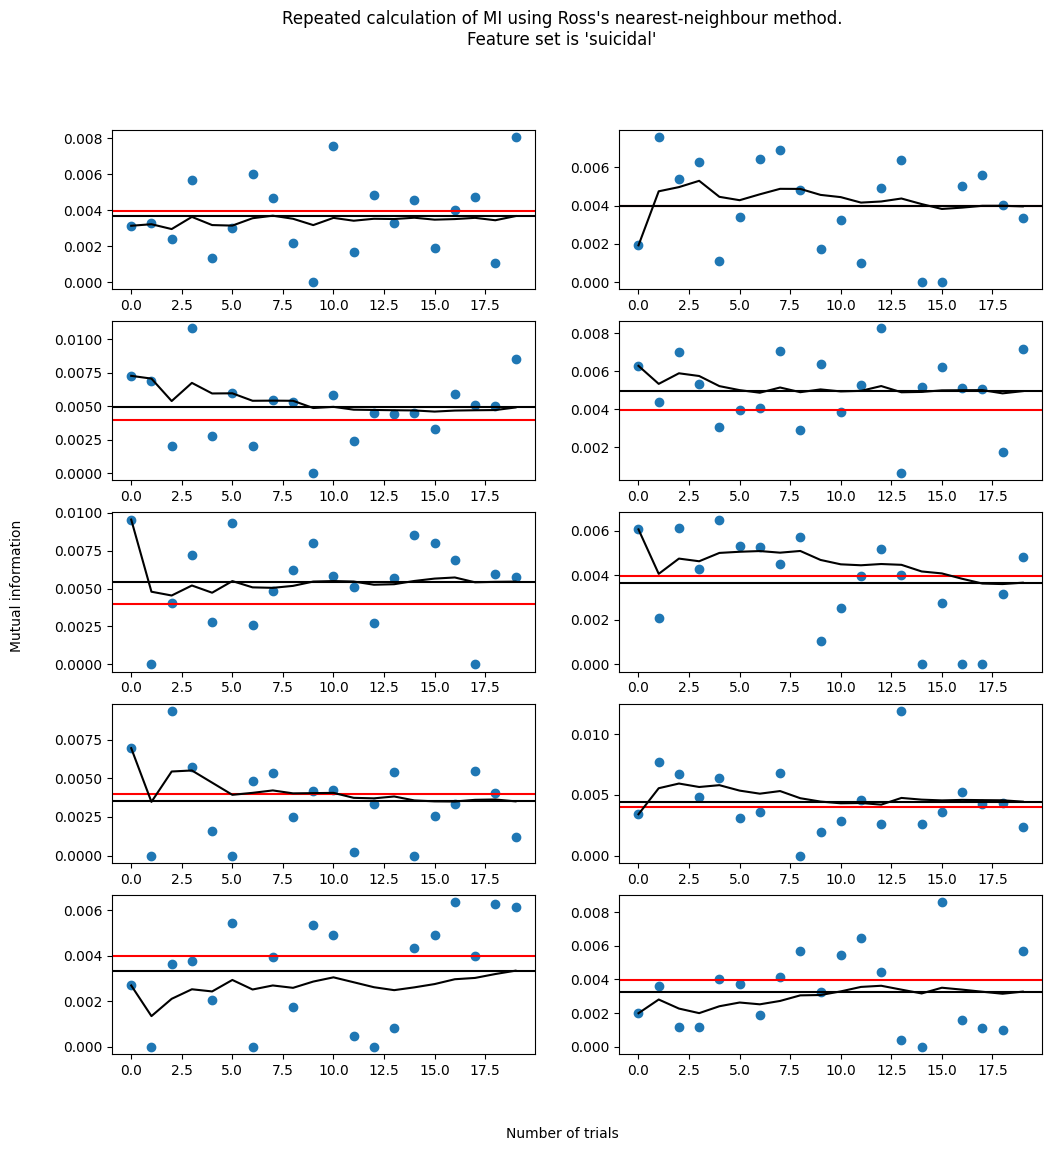

In [43]:
# Set parameters.
my_repeats = 10
my_trials = 20
warnings.filterwarnings("ignore", message = "A column-vector y was passed when a 1d array was expected")

# Get values for discrete calculation.
# ## Arbitrarily choose the feature set 'suicidal'.
my_fs = feature_set_array.suicidal_Adult
my_caseness = caseness_array.caseness_1isYes
MI_discrete = sklearn.metrics.mutual_info_score(my_fs, my_caseness)
entropy_caseness = scipy.stats.entropy(my_caseness.value_counts().astype(int), base = math.e)

# Get values for nearest-neighbour calculation.
my_fs = feature_set_array.loc[:,feature_set_array.columns == 'suicidal_Adult'].values
#my_caseness = caseness_array.loc[:,caseness_array.columns == 'CMHD_dx_and_rx'].to_numpy()
# ## Define function that does 10 repeats to produce an average and plot
def doit():
    MI_continuous = []
    for i in range(my_trials):
        MI_continuous.append(mutual_info_regression(my_fs, my_caseness, n_neighbors = 2))
    return MI_continuous


# Do plot.
fig, axs = matplotlib.pyplot.subplots(round(my_repeats / 2), 2, figsize = (12, 12))
fig.suptitle('Repeated calculation of MI using Ross\'s nearest-neighbour method.\nFeature set is \'suicidal\'')
fig.text(0.5, 0.04, 'Number of trials', ha='center')
fig.text(0.04, 0.5, 'Mutual information', va='center', rotation='vertical')
i_MI_store = []
for i_repeats in range(my_repeats):
    # Do the calculations for this iteration.
    i_MI_continuous = doit()
    i_MI_store.append(i_MI_continuous)
    # Plot this iteration.
    axs[i_repeats // 2, i_repeats % 2].plot(range(my_trials), i_MI_continuous, 'o')
    #axs.flat.set(xlabel = 'Trials', ylabel = 'Mutual information to base _e_')
    # Add MI_discrete as a line.
    axs[i_repeats // 2, i_repeats % 2].axhline(y = MI_discrete, color='r', linestyle='-')
    axs[i_repeats // 2, i_repeats % 2].axhline(y = sum(i_MI_continuous) / len(i_MI_continuous), color='k', linestyle='-')
    # Add the cumulative average as repeats progress.
    avg = []
    for i in range(len(i_MI_continuous)):
        check = 0
        l = i + 1
        for j in range(i+1):
            check = check + i_MI_continuous[j]
        avg.append(check/l)
    axs[i_repeats // 2, i_repeats % 2].plot(range(my_trials), avg, 'k')
fig

print(f'The standard deviation of the mutual information scores is {round(numpy.std(i_MI_store), 4)}.')
print(f'The interquartile range of the mutual information scores is {round(numpy.percentile(i_MI_store, 75) - numpy.percentile(i_MI_store, 25), 4)}.')
print(f'The standard deviation of the scaled mutual information scores is {round(numpy.std(i_MI_store / entropy_caseness), 4)}.')
print(f'The interquartile range of the scaled mutual information scores is {round(numpy.percentile(i_MI_store / entropy_caseness, 75) - numpy.percentile(i_MI_store / entropy_caseness, 25), 4)}.')

# Rationale for the threshold I used for 'manyDNA'
The threshold for what constitutes "many" in the definition of 'manyDNA' was based on an investigation into the tallies of did-not-attend events in a calendar year, in patients' records.

The BigQuery syntax returns a Python pandas.DataFrame containing:

- n_occurrence: a list from 1 to the maximum count of one-year did-not-attend events observed in the cohort's records, and

- n_patients_with_n_occurrences_in_a_year: the count of patients who had at least one calendar year in which they had _n_occurrence_-many did-not-attend events.


In [44]:
sql_CTEs_body = \
"""
,tbl_manyDNA AS ( 
    SELECT
        snomedcode
    FROM
        UNNEST([
                '""" + '\', \''.join(map(str, codes_to_query_DNA)) + """'
                ]) AS snomedcode
)
,tbl_manyDNA_count AS (
    SELECT
        DISTINCT person_id
        ,a.snomedcode
        ,EXTRACT(YEAR FROM dateevent) AS year_occurrence
        ,COUNT(person_id) AS n_occurrences
    FROM
        """ + server_id + """.""" + database_id + """.tbl_srcode AS a, tbl_manyDNA
    WHERE
        a.snomedcode IN (tbl_manyDNA.snomedcode)
    GROUP BY
        person_id, a.snomedcode, year_occurrence
)
,tbl_manyDNA_persons AS (
    SELECT
        DISTINCT person_id
        ,snomedcode
    FROM
        tbl_manyDNA_count
    WHERE
        n_occurrences > 1
)"""

sql_select = \
"""
SELECT
    DISTINCT n_occurrences
    ,COUNT(person_id) AS n_patients_with_n_occurrences_in_a_year
FROM
    tbl_manyDNA_count
GROUP BY
    n_occurrences
ORDER BY
    n_occurrences
"""

fs_manyDNA = pandas.read_gbq(sql_declarations + sql_studyPopulation + sql_CTEs_body + sql_select)
display(fs_manyDNA)

,n_occurrences,n_patients_with_n_occurrences_in_a_year
0,1,1796571
1,2,593937
2,3,186502
3,4,109155
4,5,41250
...,...,...
93,110,2
94,124,1
95,132,1
96,135,1


Below are three basic plots that show:
- the count of patients with each number of one-year did-not-attend tallies (i.e. a plot of n_patients_with_n_occurrences_in_a_year).
- a zoomed-in version of the count plot.
- the rate of change of the count of patients with each number of one-year did-not-attend tallies (in other words, the difference between successive counts).

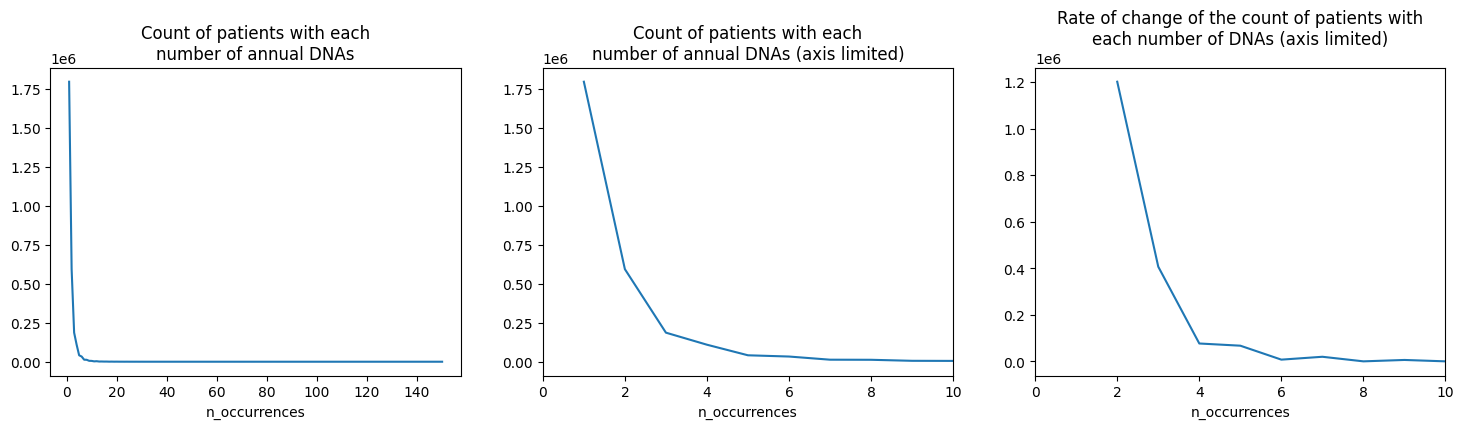

In [45]:
x_lim = 10

# Plot parameters.
fig, axs = matplotlib.pyplot.subplots(1, 3, figsize = (18, 4))


# Unbounded plot of the count of patients with each number of DNAs
axs[0].plot(
        fs_manyDNA['n_occurrences']
         ,fs_manyDNA['n_patients_with_n_occurrences_in_a_year']
        )
axs[0].set_title('Count of patients with each\nnumber of annual DNAs')
axs[0].set_xlabel('n_occurrences')
# Bounded plot of the count of patients with each number of DNAs
axs[1].plot(
        fs_manyDNA['n_occurrences']
         ,fs_manyDNA['n_patients_with_n_occurrences_in_a_year']
        )
axs[1].set_title('Count of patients with each\nnumber of annual DNAs (axis limited)')
axs[1].set_xlabel('n_occurrences')
axs[1].set_xlim([0, x_lim])

# Bounded plot of the rate of change of the count of patients with each number of DNAs (in other words, the difference between successive counts)
axs[2].plot(
         fs_manyDNA['n_occurrences'][1:]
         ,[i-j for i, j in zip(fs_manyDNA['n_patients_with_n_occurrences_in_a_year'][:-1], fs_manyDNA['n_patients_with_n_occurrences_in_a_year'][1:])]
        )
axs[2].set_title('Rate of change of the count of patients with\neach number of DNAs (axis limited)')
axs[2].set_xlabel('n_occurrences')
axs[2].set_xlim([0, x_lim])

# Show the plot.
matplotlib.pyplot.show()

__I decided that the kink at four did-not-attend events within a calendar year indicated a change in the pattern of one-year did-not-attend tallies.__

Four did-not-attend events in a calendar year are quite common, but more than four in a year is particular.